# Content:
1. [Lagrange interpolation polynomial](#1.-Lagrange-interpolation-polynomial)
2. [Runge's curse and overfitting](#2.-Runge's-curse-and-overfitting)
3. [Least squares fitted polynomial vs. interpolation polynomial](#3.-Least-squares-fitted-polynomial-vs.-interpolation-polynomial)
4. [`scipy.interpolate`](#4.-`scipy.interpolate`)

## 1. Lagrange interpolation polynomial 

![board%20work%20-28.jpg](../boardwork/board%20work%20-28.jpg)
![board%20work%20-29.jpg](../boardwork/board%20work%20-29.jpg)
![board%20work%20-30.jpg](../boardwork/board%20work%20-30.jpg)

Let's code it up!

In [2]:
import numpy as np

def L_Dk(k,x_data,x):  # x_data contains D+1 values
    
    Dplus1=len(x_data)
    
    val=1.0            # for product, initialize with one
    for i in range(0,Dplus1):
        if i != k:
            val=val*(x-x_data[i])/(x_data[k]-x_data[i])  #NOTE: product
    return(val)
    
def Lagrange_poly(x_data,y_data,x): # x_data, y_data contains D+1 values
    
    Dplus1=len(x_data)
    
    val=0              # for summation, initialize with zero
    for k in range(0,Dplus1):
        val=val+y_data[k]*L_Dk(k,x_data,x) #NOTE: sum
    return(val)

#=== Let's try a simple example of a line passing through (0,0) and (1,1)
x_given=np.array([0,1])
y_given=np.array([0,1])

#=== make 'x' continuous using grids using np.arange or np.linspace
x_new=np.arange(-1.0, 1.2, 0.2, float)  # Will give us -1, -0.8, -0.6, ... +0.8, +1.0

N_x=len(x_new)

print('------------------------------')
print('# x          interpolated y(x)')
print('------------------------------')
for i_x in range(N_x):
    print('{:10.5f}{:10.5f}'.format(x_new[i_x],Lagrange_poly(x_given,y_given,x_new[i_x])))
    #print(x_new[i_x], Lagrange_poly(x_given,y_given,x_new[i_x]))

------------------------------
# x          interpolated y(x)
------------------------------
  -1.00000  -1.00000
  -0.80000  -0.80000
  -0.60000  -0.60000
  -0.40000  -0.40000
  -0.20000  -0.20000
  -0.00000  -0.00000
   0.20000   0.20000
   0.40000   0.40000
   0.60000   0.60000
   0.80000   0.80000
   1.00000   1.00000


Using two points (0,0) and (1,1), we have found a smooth function that interpolates between the given points. 

## 2. Runge's curse and overfitting

[Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) corresponds to the oscillation of a polynomials of high degree obtained using polynomial interpolation. The data used in the previous lecture 'data/fit_01.csv' shows how this works!

In [2]:
import numpy as np

#=== Read the data from a file
myfile=open('../data/fit_01.csv','r')

x_data=np.array([])
y_data=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        string=line.split(',')  # csv, comma separated values
        valx=eval(string[0])
        valy=eval(string[1])
        x_data=np.append(x_data,[valx])
        y_data=np.append(y_data,[valy])
        
    iline=iline+1
myfile.close() 

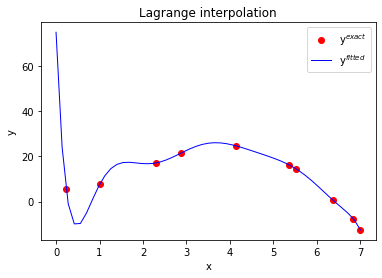

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

xgrids=np.linspace(0.0, 7.0, 51)
N_grids=len(xgrids)
ygrids=np.zeros(N_grids)

for i_grids in range(N_grids):
    ygrids[i_grids]=Lagrange_poly(x_data,y_data,xgrids[i_grids])
    #print(xgrids[i_grids],ygridsfit[i_grids])

plt.plot(xgrids,ygrids,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Lagrange interpolation')

#plt.savefig('poly_interpolation.png')  

#=== display
plt.show()

Note that the polynomial seems to be smooth in the region [2,7] but for $x<2$ it oscillates. We say that the polynomial is [overfitted](https://en.wikipedia.org/wiki/Overfitting) in the region [2,7], hence on the left side the interpolated function's behavious is unpreditable.

## 3. Least squares fitted polynomial vs. interpolation polynomial 

![board%20work%20-31.jpg](../boardwork/board%20work%20-31.jpg)

In [4]:
x_data=np.array([-3,-1,3])
y_data=np.array([3,1,2])

D=2  # polynomial degree

a=np.polyfit(x_data, y_data, D)

for i in range(D+1):
    print(i,a[i])

0 0.2083333333333333
1 -0.1666666666666668
2 0.6250000000000002


In [5]:
p = np.poly1d(a)
print(p)

        2
0.2083 x - 0.1667 x + 0.625


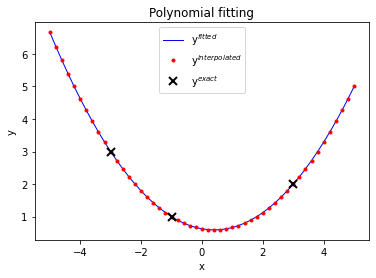

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xgrids=np.linspace(-5.0, 5.0, 51)
ygridsfit=np.polyval(a,xgrids)

ygridsinter=np.zeros(N_grids)

for i_grids in range(N_grids):
    ygridsinter[i_grids]=Lagrange_poly(x_data,y_data,xgrids[i_grids])
    
plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')
plt.plot(xgrids,ygridsinter,'.',color='r',linewidth=1,label='y$^{interpolated}$')
plt.plot(x_data,y_data,marker='x',color='k',markersize=8,markeredgewidth=2,linewidth=0,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial fitting')

#plt.savefig('test.png')  

#=== display
plt.show()

---
Homework-13: Find the equation of a generalized parabola (or a generalized quadratic function) $f(x)=a_0+a_1 x+a_2 x^2$ passing through the points (-3,3), (-1,1), and (3,2). Hint: model the function as a Lagrange interpolating polynomial.

---

---
Homework-14: Find the equation of a unique polynomial passing through the points (0,3), (1,0), (3,30), and (5,132).
    
---

---
Homework-15: Find the equation of a unique polynomial passing through the points (-2,3a), (0,a), and (1,4a).
    
---

The above problems clearly illustrate the advantage of interpolating! We can do away with matrix inversions and Gaussian elimination for modeling data with a polynomial. However, when the degree of the interpolating polynomial increases, one must be wary of Runge's phenomenon.

## 4.  `scipy.interpolate`

Let's try out some robust interpolation schemes available in the [interpolation module of the scipy package](https://docs.scipy.org/doc/scipy/reference/interpolate.html). Let's use the data used in the previous classes for this exercise.

In [7]:
import numpy as np

#=== Read the data from a file
myfile=open('../data/fit_01.csv','r')

x_data=np.array([])
y_data=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        string=line.split(',')  # csv, comma separated values
        valx=eval(string[0])
        valy=eval(string[1])
        x_data=np.append(x_data,[valx])
        y_data=np.append(y_data,[valy])
        
    iline=iline+1
myfile.close()

Let's try the simplest function, `interp1d`. The default interpolation scheme used in this function is linear interpolation.

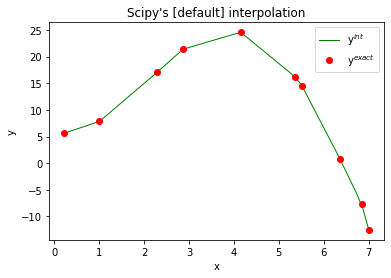

In [8]:
from scipy import interpolate
import matplotlib.pyplot as plt

f=interpolate.interp1d(x_data, y_data, kind='linear')  # or simply, f=interpolate.interp1d(x_data, y_data)  

xgrids=np.linspace(np.min(x_data), np.max(x_data), 51)
ygrids_1=f(xgrids)

plt.plot(xgrids,ygrids_1,'-',color='g',linewidth=1,label='y$^{int}$')
plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Scipy\'s [default] interpolation')

plt.show()

The function `interp1d` has options to use better schemes. For more details see [https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

Let's try the cubic interpolation scheme.

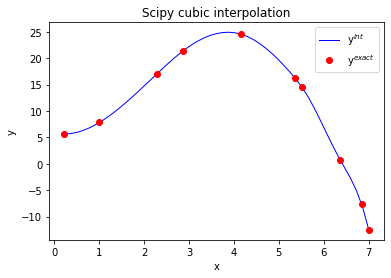

In [9]:
f=interpolate.interp1d(x_data, y_data, kind='cubic')

ygrids_2=f(xgrids)

plt.plot(xgrids,ygrids_2,'-',color='b',linewidth=1,label='y$^{int}$')
plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Scipy cubic interpolation')

plt.show()

The cubic scheme is very robust. The resulting function is smooth (continuous) and reasonably stiff (does not oscillate between data points).

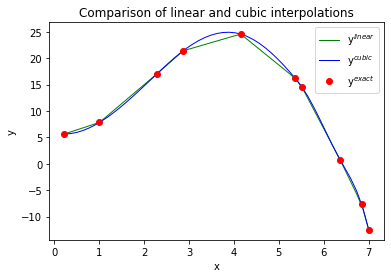

In [10]:
plt.plot(xgrids,ygrids_1,'-',color='g',linewidth=1,label='y$^{linear}$')
plt.plot(xgrids,ygrids_2,'-',color='b',linewidth=1,label='y$^{cubic}$')
plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Comparison of linear and cubic interpolations')

plt.show()

`kind='zero'`, `kind='slinear'`, `kind='quadratic;` and `kind='cubic'` refer to a spline interpolation of zeroth, first, second, and third order. 

In the spline approach, instead of fitting the data to a single, high-degree polynomial, the idea is to fit several low-degree polynomials to small subsets of the values. For example, if we have 10 data points, if we do Lagrange interpolation, we will be fitting the data to a polynomial of degree 9. Instead, in the spline approach, we will _Lagrange interpolate_ every pair of points to a cubic polynomial and get a smooth function that does not suffer from Runge's curse. 